<a href="https://colab.research.google.com/github/MorozovDesu/DataAnalysis_methods/blob/main/LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 18.3 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=42e94b1b2e11f63f342d2aeee86e2763e2ea704028d6b0cd7c8ae0b3c7d20b60
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings("ignore")

In [3]:
# задания
#в методе главных компонент обосновать выбор числа главных компонент(рассказать основную идею)

#Получим значения основных показателей описательной статистики и построим диаграммы рассеяния для признаков, измеренных в количественной шкале
df=pd.read_csv('drive/MyDrive/bodyfat.csv')
print(df.describe())

          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std      8.430476   10.7830

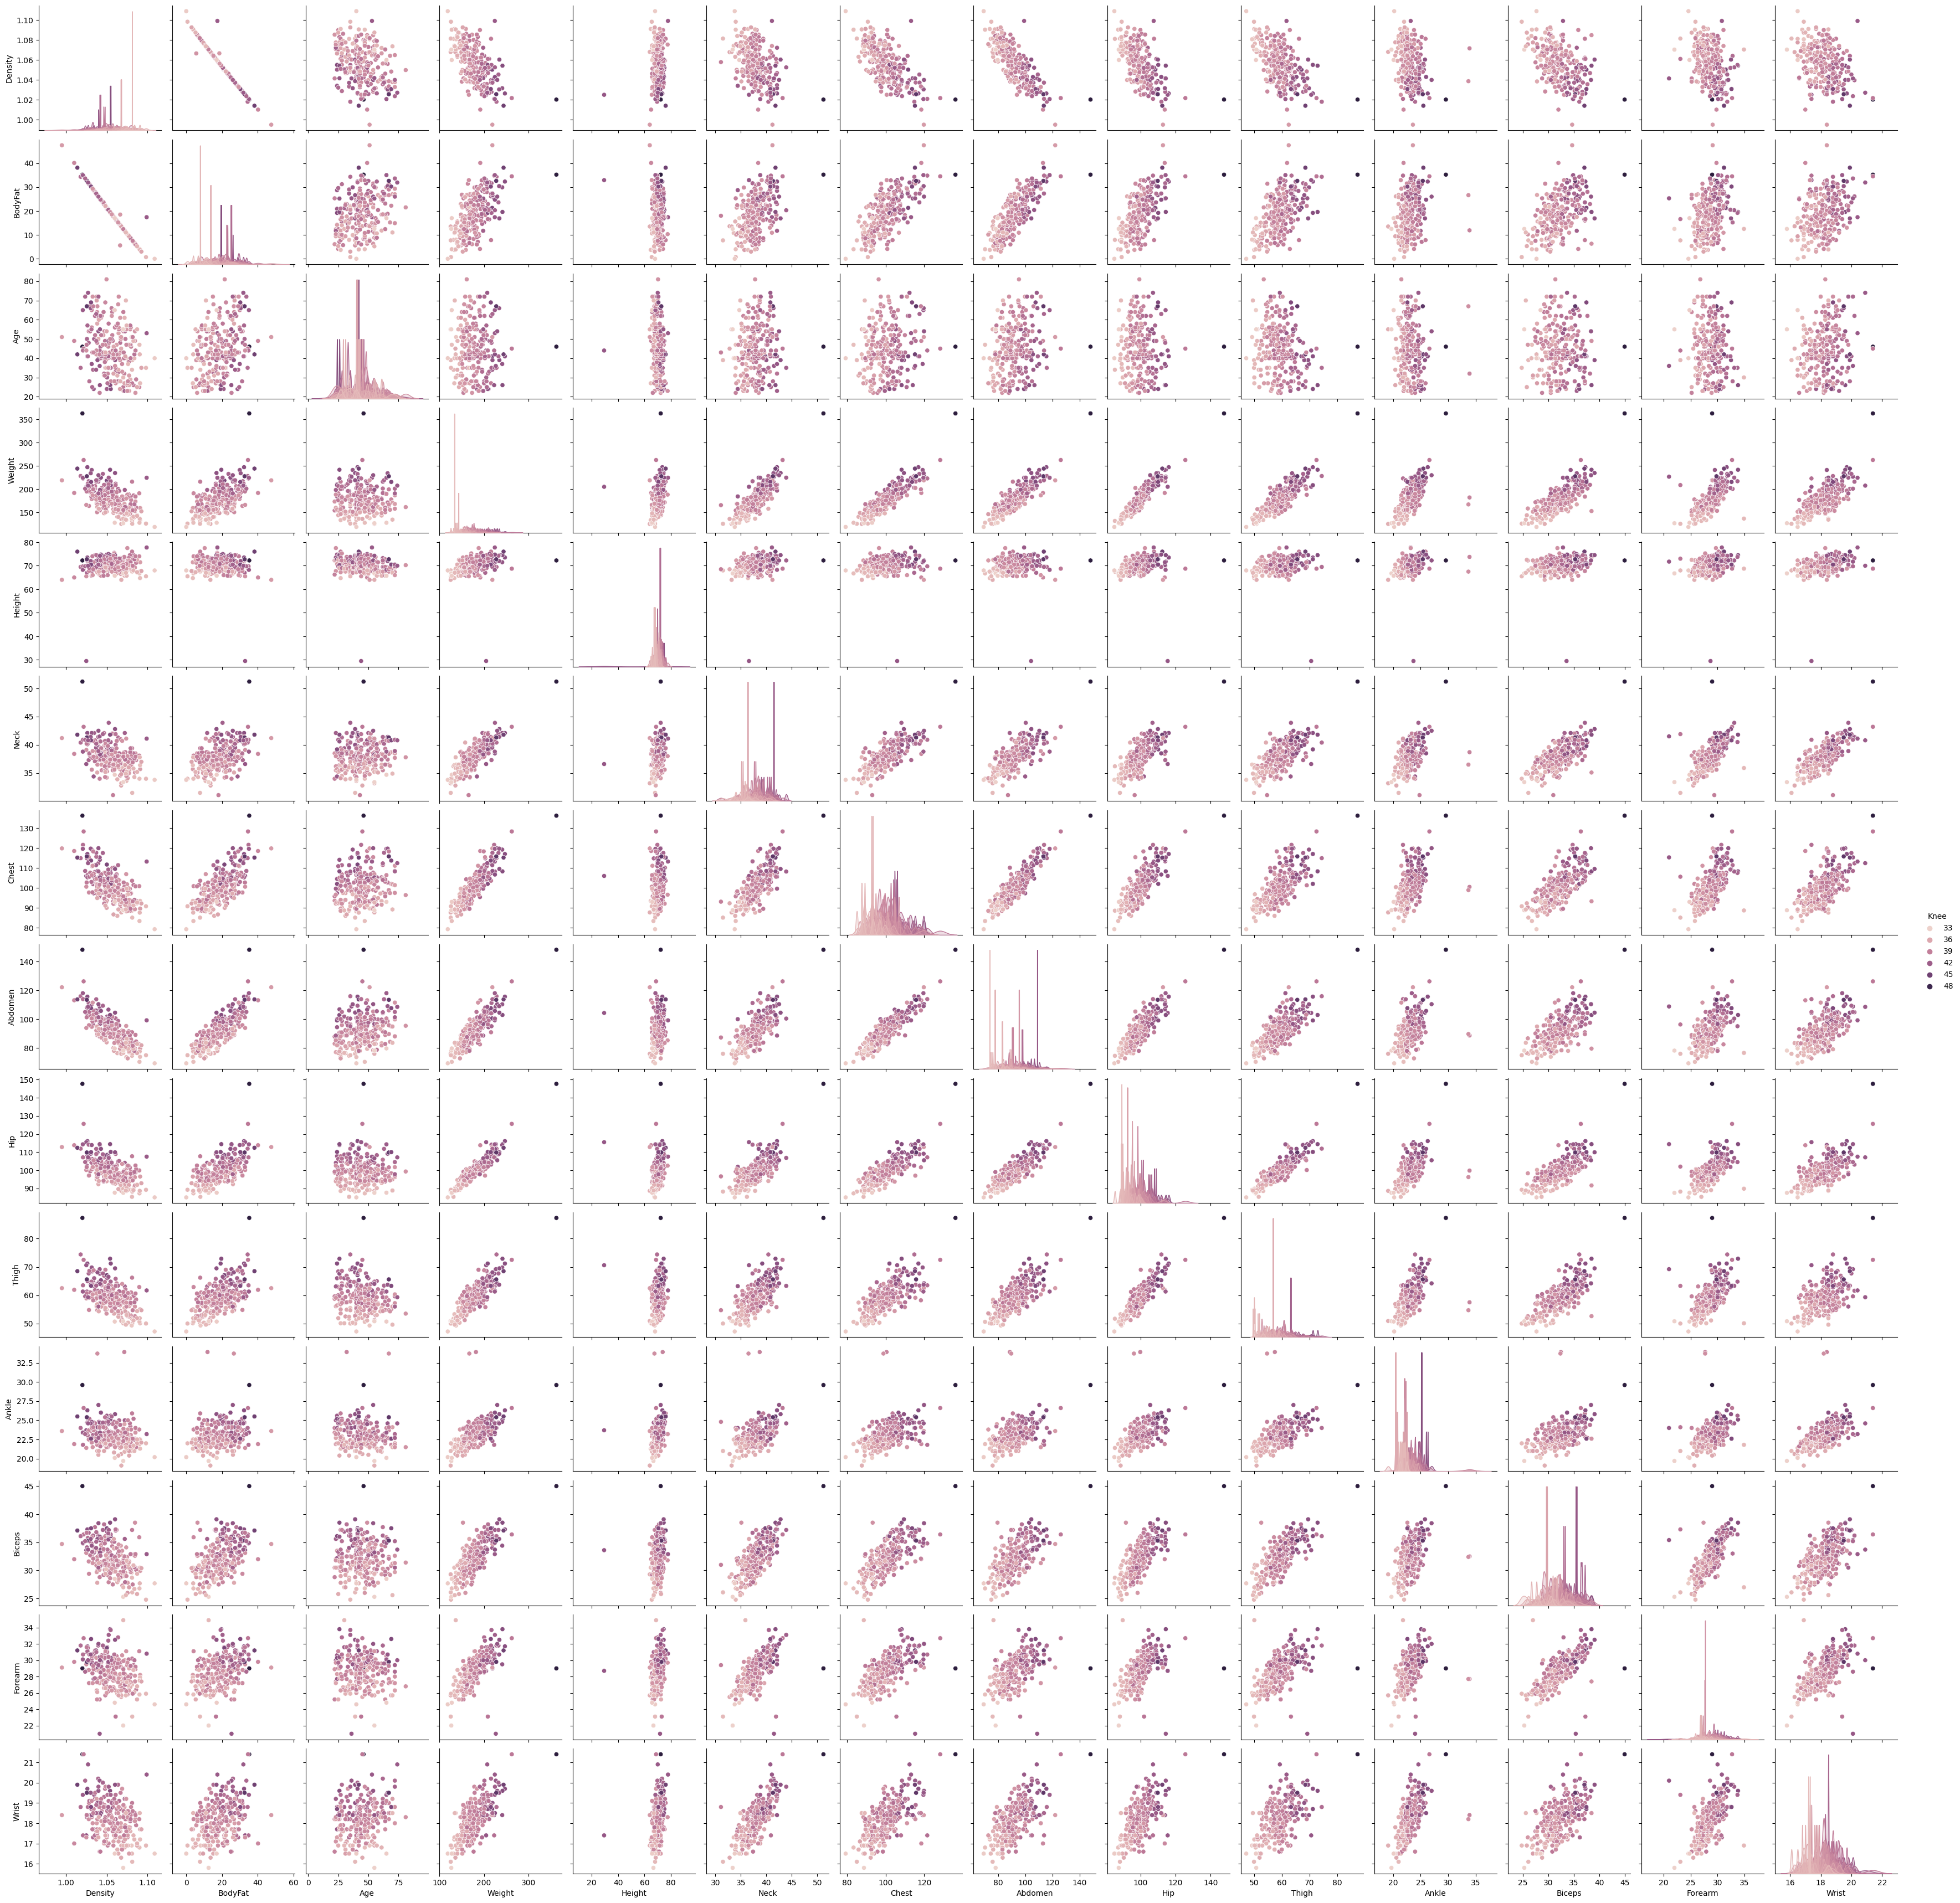

In [4]:
sns.pairplot(df,hue='Knee',diag_kws={'bw': 0.2})#hue='Knee' отвечает за цвет по значению в столбце

In [ ]:
df.head()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

In [5]:
#Отделим переменную отклика от набора данных и выполним его стандартизацию
Segment=df.pop('Knee')
scaler = StandardScaler()
df_t=pd.DataFrame(scaler.fit_transform(df))
df_t.describe()

0             1             2             3             4   \
count  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02   
mean   5.688571e-15 -1.550788e-16  2.220446e-16  2.819614e-16  1.480297e-15   
std    1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00   
min   -3.189163e+00 -2.292926e+00 -1.819583e+00 -2.060102e+00 -1.111966e+01   
25%   -7.462399e-01 -7.992934e-01 -7.263189e-01 -6.793000e-01 -5.194276e-01   
50%   -3.547554e-02  5.891481e-03 -1.498703e-01 -8.265733e-02 -4.070749e-02   
75%    7.805873e-01  7.362450e-01  7.247413e-01  6.162669e-01  5.747897e-01   
max    2.807582e+00  3.394253e+00  2.871515e+00  6.280963e+00  2.079339e+00   

                 5             6             7             8             9   \
count  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02   
mean  -8.247371e-16 -5.639228e-17  3.313046e-16  8.379540e-16 -8.582200e-16   
std    1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00   
min   -2.840817e+00 -2.558224e+00 -2.151708e+00 -2.084632e+00 -2.329591e+00   
25%   -6.562274e-01 -7.694810e-01 -7.416097e-01 -6.160653e-01 -6.500498e-01   
50%    3.271323e-03 -1.395583e-01 -1.492291e-01 -8.458411e-02 -7.747885e-02   
75%    5.906373e-01  5.408770e-01  6.289966e-01  5.063391e-01  5.618921e-01   
max    5.444135e+00  4.204531e+00  5.161290e+00  6.684808e+00  5.323774e+00   

                 10            11            12            13  
count  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02  
mean   7.542468e-16 -5.991680e-17 -3.002889e-15  3.348292e-16  
std    1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00  
min   -2.366135e+00 -2.478519e+00 -3.800254e+00 -2.607794e+00  
25%   -6.517075e-01 -6.876368e-01 -6.763048e-01 -6.759055e-01  
50%   -1.787621e-01 -7.409368e-02  1.790624e-02  7.538454e-02  
75%    5.306560e-01  6.803985e-01  6.625308e-01  6.120203e-01  
max    6.383355e+00  4.220708e+00  3.092269e+00  3.402526e+00

          Density   BodyFat       Age    Weight    Height      Neck     Chest  \
Density  1.000000 -0.987782 -0.277637 -0.594062  0.097881 -0.472966 -0.682599   
BodyFat -0.987782  1.000000  0.291458  0.612414 -0.089495  0.490592  0.702620   
Age     -0.277637  0.291458  1.000000 -0.012746 -0.171645  0.113505  0.176450   
Weight  -0.594062  0.612414 -0.012746  1.000000  0.308279  0.830716  0.894191   
Height   0.097881 -0.089495 -0.171645  0.308279  1.000000  0.253710  0.134892   
Neck    -0.472966  0.490592  0.113505  0.830716  0.253710  1.000000  0.784835   
Chest   -0.682599  0.702620  0.176450  0.894191  0.134892  0.784835  1.000000   
Abdomen -0.798955  0.813432  0.230409  0.887995  0.087813  0.754077  0.915828   
Hip     -0.609331  0.625201 -0.050332  0.940884  0.170394  0.734958  0.829420   
Thigh   -0.553091  0.559608 -0.200096  0.868694  0.148436  0.695697  0.729859   
Ankle   -0.264890  0.265970 -0.105058  0.613685  0.264744  0.477892  0.482988   
Biceps  -0.487109  0.493271 

<Axes: >

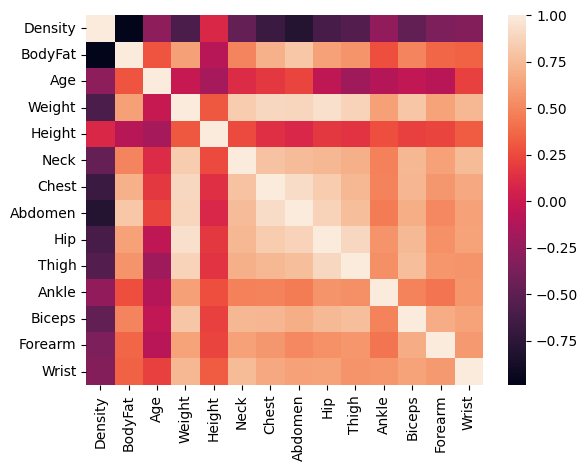

In [6]:
#Построим корреляционную матрицу и график «тепловая карта»
print(df.corr())
sns.heatmap(df.corr())

[0.58606843 0.1341946  0.07664624 0.04965994 0.04497059 0.03551716
 0.0187756  0.01559769 0.01542792 0.0120097  0.00550897 0.00305482
 0.00175514]


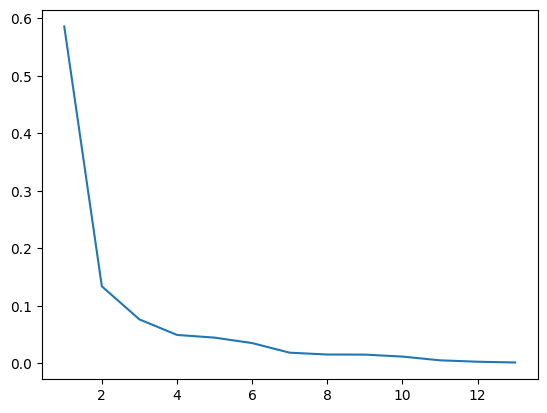

In [7]:
#Определим, какую часть общей дисперсии описывают главные компоненты
pca = PCA(n_components=13)
pc=pca.fit_transform(df_t)
v = pca.explained_variance_ratio_
print(v)
plt.plot(range(1,df_t.shape[1]),v) #(1, df_t.shape[1]+1) вместо (0, df_t.shape[1])

[0.58606843 0.1341946  0.07664624 0.04965994 0.04497059]


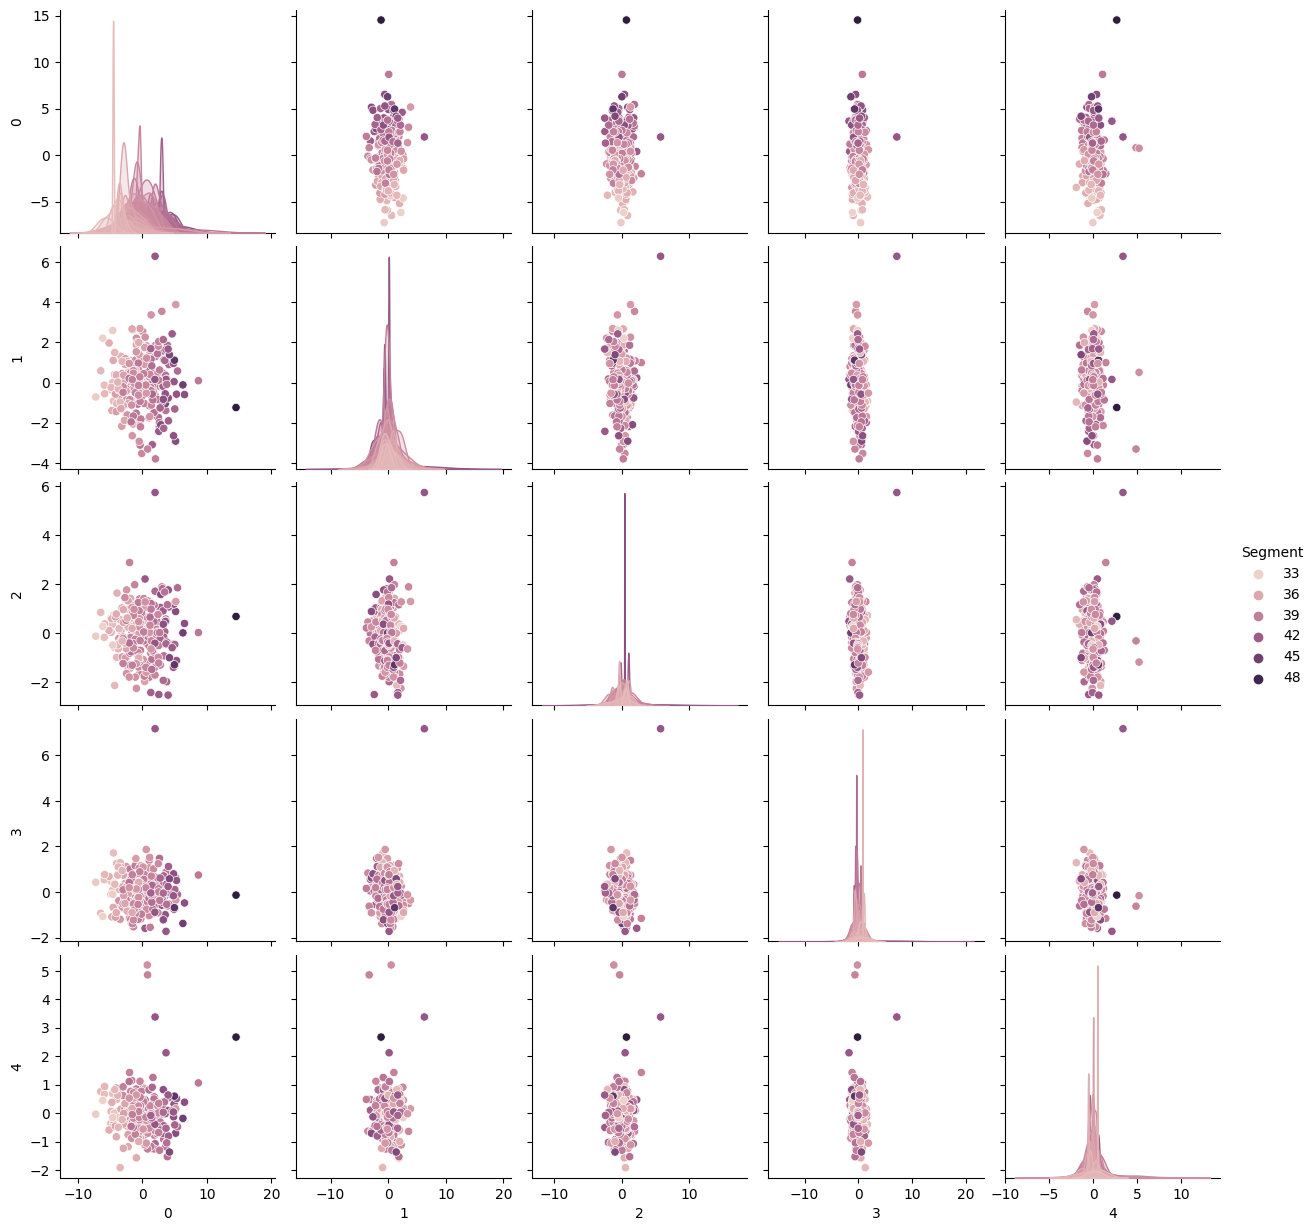

In [8]:
#построим диаграммы рассеяния для новой системы координат
pca = PCA(n_components=5)
pc=pca.fit_transform(df_t)
pc=pd.DataFrame(pc)
pc['Segment']=Segment
sns.pairplot(pc,hue='Segment')
v = pca.explained_variance_ratio_
print(v)

In [87]:
#Выполним факторный анализ для пяти факторов без вращения, выведем матрицу нагрузок и матрицу общностей
fa=FactorAnalyzer(n_factors=4,rotation=None) 
scaler = StandardScaler()
aps_reduced=scaler.fit_transform(df_t)
fa.fit(aps_reduced)
loads=fa.loadings_
print(loads)
print("---------------------------------")
print(fa.get_communalities())
print("---------------------------------")
print(fa.get_uniquenesses())


[[-7.23601252e-01  6.06514222e-01  1.94530121e-01  1.35130737e-01]
 [ 7.39186279e-01 -6.07838764e-01 -1.75073008e-01 -1.26065179e-01]
 [ 8.61174468e-02 -5.81171524e-01  6.12524523e-01  7.40100142e-02]
 [ 9.72666362e-01  1.66748116e-01 -1.79179214e-02  1.38655955e-01]
 [ 1.99336495e-01  3.93445693e-01  1.26305900e-01 -7.56948454e-04]
 [ 8.38628699e-01  1.43674254e-01  2.07320630e-01 -3.68902721e-02]
 [ 9.13393661e-01 -9.58036287e-02  6.92179503e-02  5.12485524e-02]
 [ 9.34123885e-01 -2.46819364e-01 -1.51627903e-03  1.53280885e-01]
 [ 9.22448317e-01  8.65736497e-02 -1.72157907e-01  2.24795727e-01]
 [ 8.60427160e-01  1.78490951e-01 -2.92780985e-01  7.13345771e-02]
 [ 5.71320894e-01  2.75462808e-01  3.11999019e-02  5.16125532e-02]
 [ 8.17978191e-01  1.90836527e-01 -1.15799588e-02 -1.74175162e-01]
 [ 6.64960638e-01  2.61830553e-01  6.44326743e-02 -3.83166750e-01]
 [ 7.42902459e-01  2.34438766e-01  4.48953897e-01 -1.36547035e-02]]
---------------------------------
[0.94756056 0.96240731 0.72

In [86]:
#Выполним факторный анализ с вращением varimax для пяти факторов, выведем матрицу нагрузок и матрицу общностей
fa=FactorAnalyzer(n_factors=4,rotation='varimax') 
fa.fit(df_t)
loads=fa.loadings_
print(loads)
print("---------------------------------")
print(fa.get_communalities())
print("---------------------------------")
print(fa.get_uniquenesses())


[[-0.11978304 -0.9185209  -0.262674   -0.14329799]
 [ 0.13186079  0.9177717   0.27608024  0.16277234]
 [-0.04599455  0.20228897 -0.04892559  0.82486982]
 [ 0.60941135  0.3651842   0.69837771 -0.03095464]
 [ 0.37258005 -0.20745041  0.14789015 -0.0822511 ]
 [ 0.6832319   0.28981273  0.44770934  0.13054588]
 [ 0.51227812  0.51262664  0.54942008  0.1542935 ]
 [ 0.3729717   0.61724256  0.63279064  0.19100864]
 [ 0.43854045  0.41826591  0.7483696  -0.10609521]
 [ 0.47301292  0.41746237  0.61891766 -0.2862309 ]
 [ 0.47890478  0.08827899  0.40342506 -0.07765218]
 [ 0.67495967  0.37107362  0.36284956 -0.10512845]
 [ 0.74397699  0.28536391  0.10700956 -0.12373699]
 [ 0.75281236  0.08281751  0.38902922  0.28927969]]
---------------------------------
[0.94756055 0.9624073  0.72584027 0.99343131 0.21048831 0.76828312
 0.85088386 0.95700456 0.93857736 0.86300325 0.40592461 0.73597798
 0.66169622 0.80861166]
---------------------------------
[0.05243945 0.0375927  0.27415973 0.00656869 0.78951169 0.2

Основной идеей метода главных компонент является сокращение размерности исходных данных с минимальной потерей информации. Один из способов определения оптимального числа главных компонент - это построение графика кумулятивной доли объясненной дисперсии от числа главных компонент. Оптимальное число главных компонент - это число, при котором изменение кумулятивной доли объясненной дисперсии становится незначительным.

Text(0, 0.5, 'cumulative explained variance ratio')

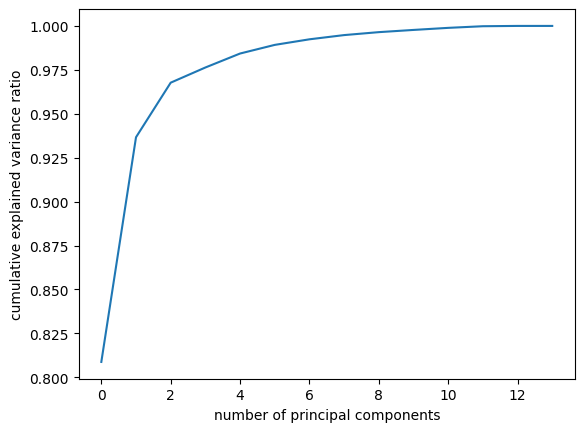

In [90]:
pca = PCA()
df_pca = pca.fit_transform(df)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_explained_variance_ratio)
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance ratio')
#На графике мы можем наблюдать, как изменяется кумулятивная доля объясненной дисперсии от числа главных компонент.
#Оптимальное число главных компонент-это число, при котором изменение кумулятивной доли объясненной дисперсии становится незначительным.
#На графике видно, что число главных компонент после которого изменения незначительны равно 4

Для решения задачи кластеризации необходимо выполнить следующие шаги:

Подготовить данные: очистить данные от выбросов, пропущенных значений, нормализовать данные.

Выбрать подходящий алгоритм кластеризации: иерархический, k-средних, DBSCAN и т.д.

Определить количество кластеров: можно использовать методы локтя, силуэта или графика WSS (within-cluster sum of squares).

Применить алгоритм кластеризации к данным.

Оценить качество кластеризации: с помощью метрик, таких как силуэт или adjusted Rand index.

Проанализировать результаты: визуализировать кластеры, проанализировать характеристики объектов в каждом кластере.



In [11]:
import pandas as pd
import numpy as np
# Определяем среднее значение и стандартное отклонение
# mean = df.mean()
# std = df.std()
# # Определяем границы данных на основе правила трех сигм
# lower_bound = mean - 3 * std
# upper_bound = mean + 3 * std
# # Удаляем строки, которые содержат значения за пределами границ
# clean_df = df[(df > lower_bound) & (df < upper_bound)]
#------------------------------------------------------------------
# Определяем межквартильный размах
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Определяем границы данных на основе межквартильного размаха
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Удаляем строки, которые содержат значения за пределами границ
clean_df = df[(df > lower_bound) & (df < upper_bound)]

In [12]:
#Считаю кол-во нулевых значений
clean_df.isnull().sum()

Density    1
BodyFat    1
Age        0
Weight     2
Height     1
Neck       3
Chest      2
Abdomen    3
Hip        3
Thigh      4
Ankle      4
Biceps     1
Forearm    5
Wrist      4
dtype: int64

In [13]:
#Удаляем нулевые значения
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
imputer.fit(clean_df)
X1 = imputer.transform(clean_df)
no_null_df = pd.DataFrame(X1,columns = clean_df.columns)
no_null_df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [14]:
#Нормализация данных 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(no_null_df)

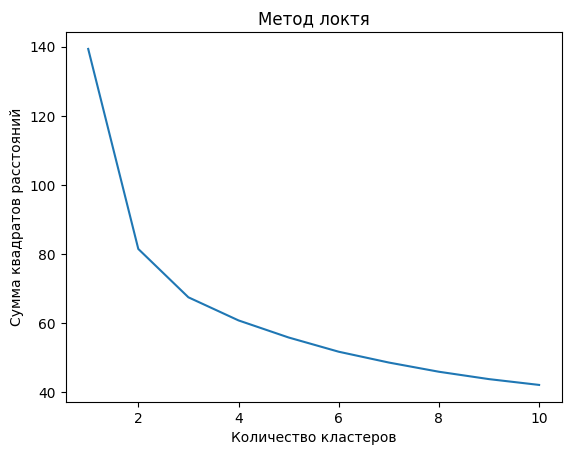

In [15]:
#Определение количества кластеров от 1 до 10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)
# построение графика
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()
#После 2-3 кластеров идёт не очень быстрое уменьшение

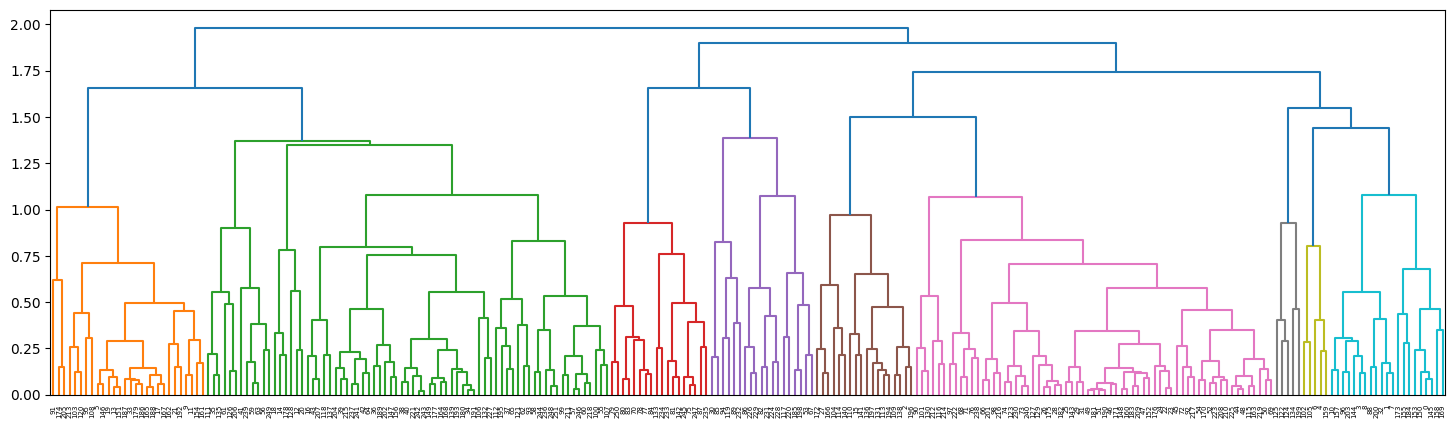

In [16]:
sc = StandardScaler()#стандартизируем данные
normalized_data = pd.DataFrame(sc.fit_transform(df))
#Выполним иерархическую кластеризацию
row_dist=pdist(normalized_data,metric='cosine')#euclidean minkowskiMinkowski manhattan cosine correlation hamming jaccard chebyshev
mergings = linkage(row_dist, method='complete')
plt.figure(figsize=(18,5))
#Построение дендрограммы
dendrogram(mergings) 
plt.show()

In [17]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       252 non-null    float64
 1   1       252 non-null    float64
 2   2       252 non-null    float64
 3   3       252 non-null    float64
 4   4       252 non-null    float64
 5   5       252 non-null    float64
 6   6       252 non-null    float64
 7   7       252 non-null    float64
 8   8       252 non-null    float64
 9   9       252 non-null    float64
 10  10      252 non-null    float64
 11  11      252 non-null    float64
 12  12      252 non-null    float64
 13  13      252 non-null    float64
dtypes: float64(14)
memory usage: 27.7 KB


In [18]:
# определение числа кластеров
N = 3
# создание объекта k-средних и обучение модели
kmeans = KMeans(n_clusters=N, random_state=0)
kmeans.fit(normalized_data)
# получение меток кластеров для каждого объекта
cluster_labels = kmeans.predict(normalized_data)
# вывод результата кластеризации
print("Метки кластеров:")
print(cluster_labels)

Метки кластеров:
[0 2 0 2 2 1 2 2 2 2 2 1 2 1 1 2 1 1 2 1 2 1 0 0 0 0 0 0 0 0 2 0 2 1 1 1 1
 1 1 1 1 1 1 1 0 2 0 0 0 0 0 0 0 0 0 1 2 1 1 2 1 2 1 2 1 1 0 0 0 0 2 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 1 2 2 0 1 2 2 2 1 2 2 2 1 2 2 2
 2 1 2 2 0 2 2 2 2 1 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 0 1 1
 0 1 0 1 0 2 1 2 1 2 0 2 0 2 2 0 1 1 2 1 1 2 0 0 2 2 1 0 0 1 2 1 1 0 0 0 2
 2 1 1 1 2 0 1 2 1 2 2 2 2 0 2 2 0 1 2 1 2 2 1 0 0 0 1 2 2 2 1 0 0 1 0 2 1
 0 0 2 0 2 1 2 2 0 2 2 2 2 2 2 1 2 1 0 1 1 1 1 0 1 0 1 2 2 1]


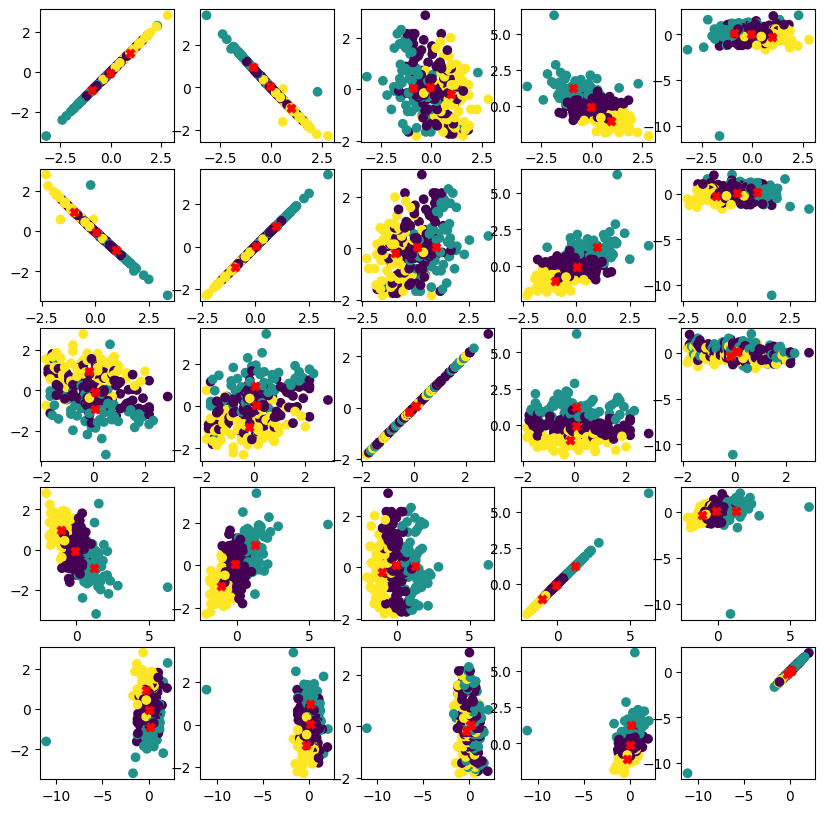

In [19]:
D = 5
#Выполним кластеризацию методом k-средних, выведем диаграммы рассеяния, нанесем центры кластеров
model = KMeans(n_clusters=N, max_iter=1000)
model.fit(normalized_data)
y=model.predict(normalized_data)
plt.figure(figsize=(10,10))
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        sub=plt.subplot(D,D,k)
        sub.scatter(normalized_data[i],normalized_data[j],c=y)
        plt.scatter(model.cluster_centers_[:,i],model.cluster_centers_[:,j], marker='X', c='red')

In [25]:
#Оценка качества кластеризации 
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(normalized_data, cluster_labels)
silhouette_avg = np.mean(silhouette_vals)
print("Средний коэффициент силуэта:", silhouette_avg)

# from sklearn.metrics import silhouette_score, calinski_harabasz_score

# silhouette score
# silhouette_avg = silhouette_score(normalized_data, cluster_labels) print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz Index
# ch_index = calinski_harabasz_score(normalized_data, cluster_labels) print("Calinski-Harabasz Index:", ch_index)

Средний коэффициент силуэта: 0.20447711785481568


In [21]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import pandas as pd

# # загрузка данных
# data = pd.DataFrame(normalized_data, columns=['feat1', 'feat2','feat3','feat4' ,'feat5' ,'feat6' ,'feat7' ,'feat8' ,'feat9' ,'feat10' ,'feat11' ,'feat12' ,'feat13' , 'feat14'])
# # разделение данных на признаки и целевую переменную
# X = data.iloc[:,:-1]
# y = data.iloc[:,-1]

# # определение числа кластеров
# k_range = range(2,10)
# scores = []
# for k in k_range:
#     # создание модели кластеризации
#     kmeans = KMeans(n_clusters=k)
#     # обучение модели на данных
#     kmeans.fit(normalized_data)
#     # получение метрики силуэта
#     score = silhouette_score(normalized_data, kmeans.labels_)
#     scores.append(score)

# # вывод графика зависимости метрики силуэта от числа кластеров
# import matplotlib.pyplot as plt
# plt.plot(k_range, scores)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [26]:
df.head(10)

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   
5   1.0502     20.9   24  210.25   74.75  39.0  104.5     94.4  107.8   66.0   
6   1.0549     19.2   26  181.00   69.75  36.4  105.1     90.7  100.3   58.4   
7   1.0704     12.4   25  176.00   72.50  37.8   99.6     88.5   97.1   60.0   
8   1.0900      4.1   25  191.00   74.00  38.1  100.9     82.5   99.9   62.9   
9   1.0722     11.7   23  198.25   73.50  42.1   99.6     88.6  104.1   63.1   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  
5   25.6    35.7     30.6   18.8  
6   22.9    31.9     27.8   17.7  
7   23.2    30.5     29.0   18.8  
8   23.8    35.9     31.1   18.2  
9   25.0    35.6     30.0   19.2

In [68]:
new_df = df[["Density","BodyFat","Age" ,"Weight","Height","Chest","Abdomen"]]
print(new_df.describe())

          Density     BodyFat         Age      Weight      Height       Chest  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810  100.824206   
std      0.019031    8.368740   12.602040   29.389160    3.662856    8.430476   
min      0.995000    0.000000   22.000000  118.500000   29.500000   79.300000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   94.350000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   99.650000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000  105.375000   
max      1.108900   47.500000   81.000000  363.150000   77.750000  136.200000   

          Abdomen  
count  252.000000  
mean    92.555952  
std     10.783077  
min     69.400000  
25%     84.575000  
50%     90.950000  
75%     99.325000  
max    148.100000  


In [69]:
# Определяем межквартильный размах
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1
# Определяем границы данных на основе межквартильного размаха
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Удаляем строки, которые содержат значения за пределами границ
clean_df2 = new_df[(new_df > lower_bound) & (new_df < upper_bound)]
#Считаю кол-во нулевых значений
clean_df2.isnull().sum()

Density    1
BodyFat    1
Age        0
Weight     2
Height     1
Chest      2
Abdomen    3
dtype: int64

In [70]:
#Удаляем нулевые значения
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
imputer.fit(clean_df2)
X1 = imputer.transform(clean_df2)
no_null_df2 = pd.DataFrame(X1,columns = clean_df2.columns)
no_null_df2.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Chest      0
Abdomen    0
dtype: int64

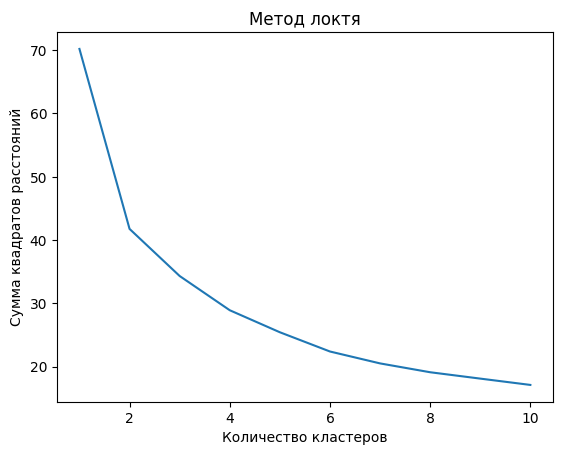

In [73]:
#Нормализация данных 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data2 = scaler.fit_transform(no_null_df2)
#Определение количества кластеров от 1 до 10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(normalized_data2)
    wcss.append(kmeans.inertia_)
# построение графика
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()
#После 2-4 кластеров идёт не очень быстрое уменьшение

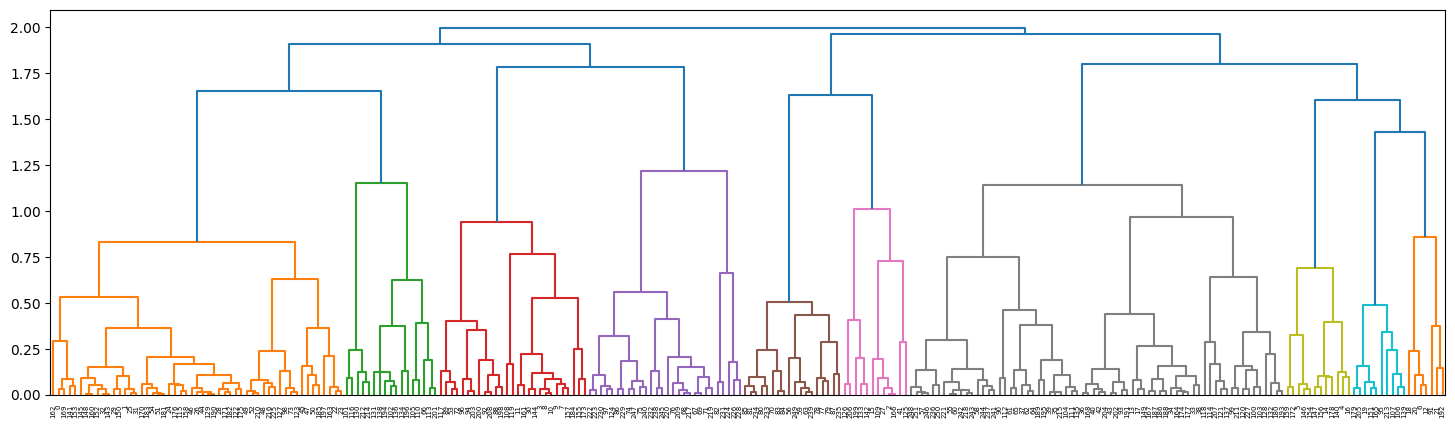

In [74]:
sc = StandardScaler()#стандартизируем данные
normalized_data2 = pd.DataFrame(sc.fit_transform(new_df))
#Выполним иерархическую кластеризацию
row_dist=pdist(normalized_data2,metric='cosine')#euclidean minkowskiMinkowski manhattan cosine correlation hamming jaccard chebyshev
mergings = linkage(row_dist, method='complete')
plt.figure(figsize=(18,5))
#Построение дендрограммы
dendrogram(mergings) 
plt.show()

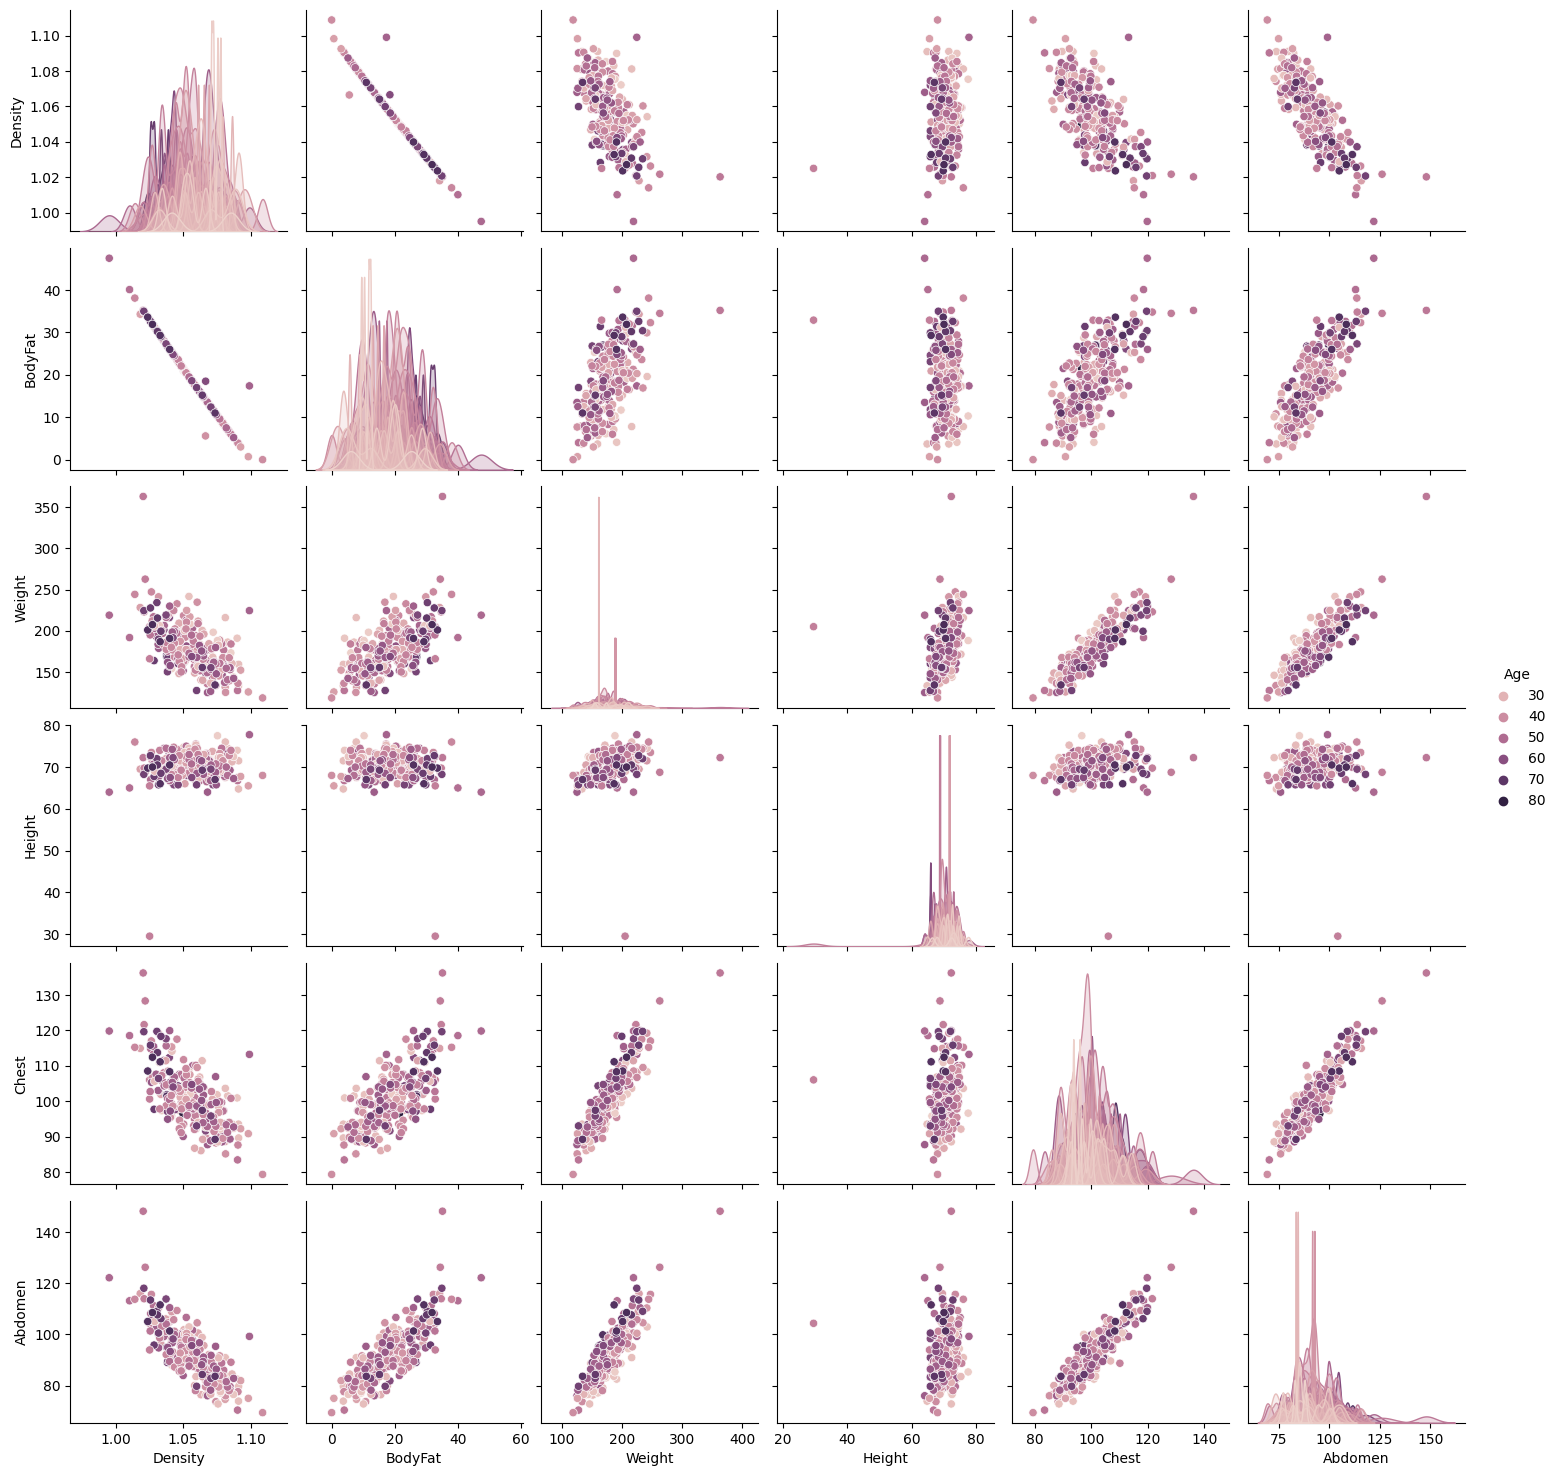

In [75]:
sns.pairplot(new_df,hue='Age',diag_kws={'bw': 0.2})#hue='Knee' отвечает за цвет по значению в столбце

In [76]:
# определение числа кластеров
N = 2
# создание объекта k-средних и обучение модели
kmeans = KMeans(n_clusters=N, random_state=0)
kmeans.fit(normalized_data2)
# получение меток кластеров для каждого объекта
cluster_labels = kmeans.predict(normalized_data2)
# вывод результата кластеризации
print("Метки кластеров:")
print(cluster_labels)

Метки кластеров:
[1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0]


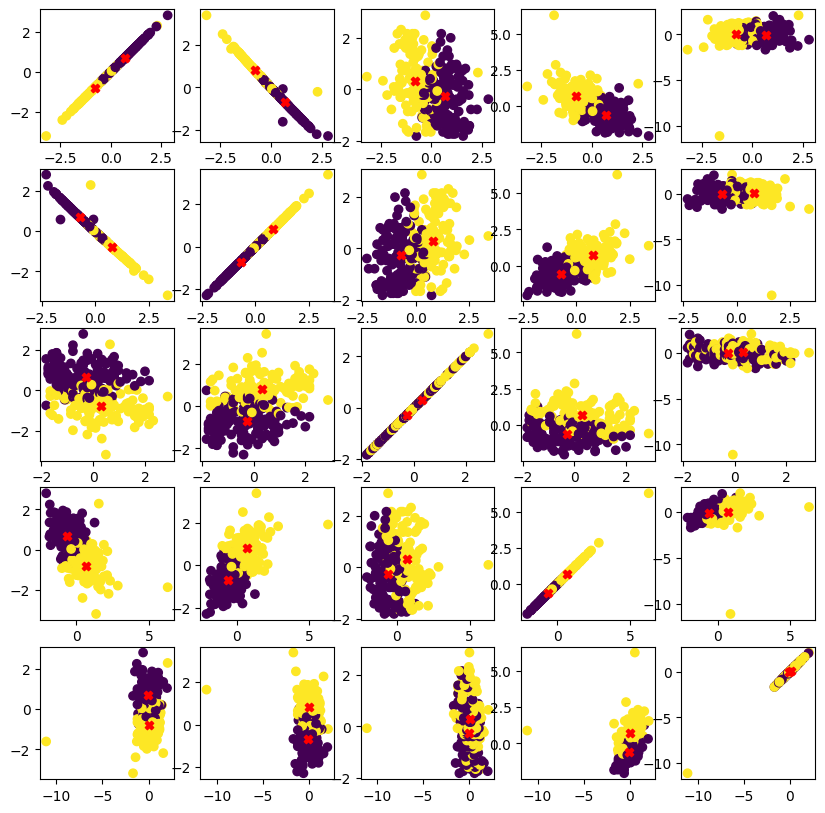

In [77]:
D = 5
#Выполним кластеризацию методом k-средних, выведем диаграммы рассеяния, нанесем центры кластеров
model = KMeans(n_clusters=N, max_iter=1000)
model.fit(normalized_data2)
y=model.predict(normalized_data2)
plt.figure(figsize=(10,10))
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        sub=plt.subplot(D,D,k)
        sub.scatter(normalized_data2[i],normalized_data2[j],c=y)
        plt.scatter(model.cluster_centers_[:,i],model.cluster_centers_[:,j], marker='X', c='red')

In [79]:
#Коэффициент силуэта - это метрика оценки качества кластеризации, которая определяет,
##насколько объекты в кластере похожи друг на друга по сравнению с объектами в других кластерах.
#Чем выше коэффициент, тем лучше кластеризация.
from sklearn.metrics import silhouette_score

silhouette_vals2 = silhouette_samples(normalized_data2, cluster_labels)
silhouette_avg2 = np.mean(silhouette_vals2)
print("Средний коэффициент силуэта:", silhouette_avg2)

Средний коэффициент силуэта: 0.33301849735603245


Средний коэффициент силуэта увеличелся, следовательно качество кластеризации повысилось